# MLP Archietectures on MNIST dataset

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# input image dimensions
img_rows, img_cols = X_train.shape[1] , X_train.shape[2]
num_pixels = img_rows*img_cols
print(num_pixels)

784


In [0]:
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [0]:
#Normalizing
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [0]:
batch_size = 128
num_classes = 10
epochs = 15

In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## 1. Archietecture -1 - 

### 1.1.1 Without droput, Batch Normalization

In [10]:
model_1_a = Sequential()
#hidden layer 1
model_1_a.add(Dense(units=1024, input_shape=(num_pixels, ), activation='relu', kernel_initializer='normal'))

#hidden layer 2
model_1_a.add(Dense(units=512, activation='relu', kernel_initializer='normal'))

#output layer
model_1_a.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

#compile with adam optimizers
model_1_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_1_a.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
#fitting the model
history_1_a = model_1_a.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=batch_size, epochs=epochs, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 12s 199us/step - loss: 0.1919 - acc: 0.9428 - val_loss: 0.1080 - val_acc: 0.9663
Epoch 2/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0701 - acc: 0.9784 - val_loss: 0.0771 - val_acc: 0.9748
Epoch 3/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0441 - acc: 0.9856 - val_loss: 0.0834 - val_acc: 0.9753
Epoch 4/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.0308 - acc: 0.9902 - val_loss: 0.0720 - val_acc: 0.9790
Epoch 5/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.0236 - acc: 0.9919 - val_loss: 0.0962 - val_acc: 0.9732
Epoch 6/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0801 - val_acc: 0.9786
Epoch 7/15
60000/60000 [

In [95]:
score_1_a = model_1_a.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy:', score[1])

Test Accuracy: 0.9815


### 1.1.2 Plotting Epoch vs Loss

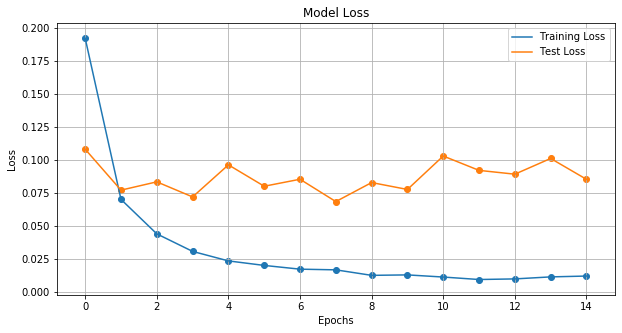

In [36]:
plt.figure(figsize=(10,5))
plt.plot(history_1_a.history['loss'], label='Training Loss')
plt.plot(history_1_a.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_1_a.history['loss'])
plt.scatter([i for i in range(epochs)], history_1_a.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()


### 1.1.3 Plotting Epoch vs Accuracy

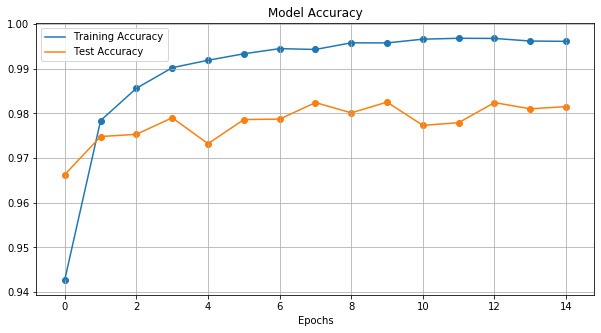

In [35]:
plt.figure(figsize=(10,5))
plt.plot(history_1_a.history['acc'], label='Training Accuracy')
plt.plot(history_1_a.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_1_a.history['acc'])
plt.scatter([i for i in range(epochs)], history_1_a.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()
plt.show()

### 1.1.4 Weight distributions

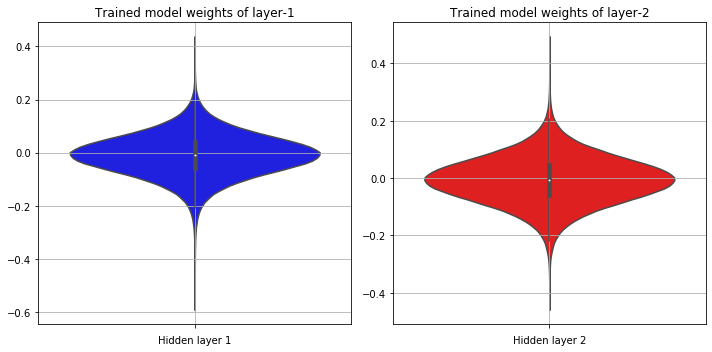

In [48]:
w_after_1_a = model_1_a.get_weights()
h1_w = w_after_1_a[0].flatten().reshape(-1,1)
h2_w = w_after_1_a[2].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
plt.title('Weights of the model after trained')

plt.subplot(1,2,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(1,2,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()

plt.show()

### 1.2 With Dropout and Batch Normalization

In [37]:
model_1_b = Sequential()

#1st hidden layer
model_1_b.add(Dense(units=1024, input_shape = (num_pixels, ), activation='relu', kernel_initializer='normal'))

#drop out
model_1_b.add(Dropout(0.3))

#hidden layer 2
model_1_b.add(Dense(units=512, activation='relu', kernel_initializer='normal'))

#Batch Normalization
model_1_b.add(BatchNormalization())

#output layer
model_1_b.add(Dense(units=10, activation='softmax'))

#compile
model_1_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#summary
model_1_b.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,335,818
Trainable params: 1,334,794
Non-trainable params: 1,024
_______________________________________________________

In [38]:
history_1_b = model_1_b.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 55us/step - loss: 0.2290 - acc: 0.9311 - val_loss: 0.1007 - val_acc: 0.9690
Epoch 2/15
60000/60000 [==============================] - 3s 48us/step - loss: 0.1025 - acc: 0.9679 - val_loss: 0.0806 - val_acc: 0.9734
Epoch 3/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.0736 - acc: 0.9762 - val_loss: 0.0731 - val_acc: 0.9758
Epoch 4/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.0581 - acc: 0.9813 - val_loss: 0.0660 - val_acc: 0.9794
Epoch 5/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.0472 - acc: 0.9843 - val_loss: 0.0649 - val_acc: 0.9801
Epoch 6/15
60000/60000 [==============================] - 3s 51us/step - loss: 0.0417 - acc: 0.9862 - val_loss: 0.0664 - val_acc: 0.9808
Epoch 7/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.0375 - acc: 0.9878 - val_loss: 0.0750 - val_acc

In [88]:
score_1_b = model_1_b.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy with Dropout and Batch Normalisation:', score_1_b[1])

Test Accuracy with Dropout and Batch Normalisation: 0.9844


### 1.2.2 Plotting Epoch vs Loss

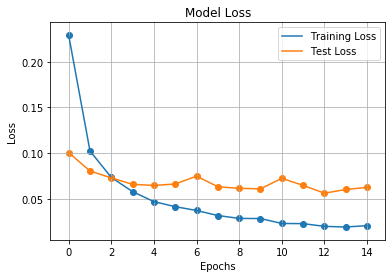

In [40]:
plt.plot(history_1_b.history['loss'], label='Training Loss')
plt.plot(history_1_b.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_1_b.history['loss'])
plt.scatter([i for i in range(epochs)], history_1_b.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 1.2.3 Plotting Epoch vs Accuracy

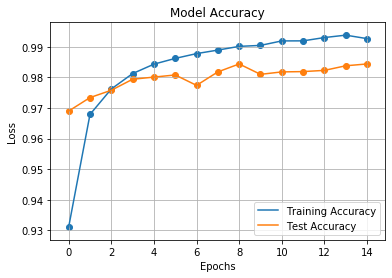

In [42]:
plt.plot(history_1_b.history['acc'], label='Training Accuracy')
plt.plot(history_1_b.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_1_b.history['acc'])
plt.scatter([i for i in range(epochs)], history_1_b.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 1.2.4 Distribution of Weights

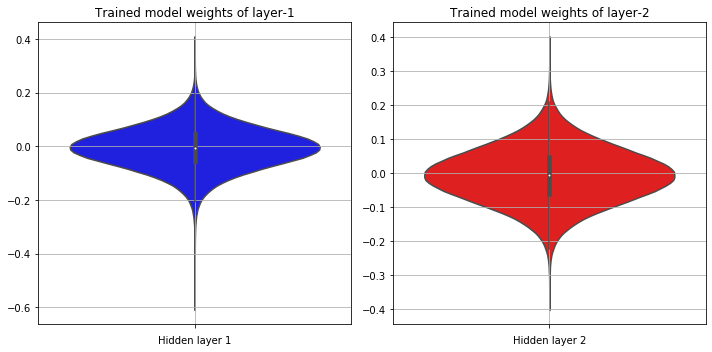

In [86]:
w_after_1_b = model_1_b.get_weights()
h1_w = w_after_1_b[0].flatten().reshape(-1,1)
h2_w = w_after_1_b[2].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10, 5))
#plt.suptitle('Weights of the model after trained')

plt.subplot(1,2,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(1,2,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()

plt.show()

## 2. Architecture - 2

### 2.1.1 Without Dropout and Batch Normalization

In [43]:
model_2_a = Sequential()
#hidden layer 1
model_2_a.add(Dense(units=512, input_shape=(num_pixels, ), activation='relu', kernel_initializer='normal'))

#hidden layer 2
model_2_a.add(Dense(units=256, activation='relu', kernel_initializer='normal'))

#hidden layer 3
model_2_a.add(Dense(units=128, activation='relu', kernel_initializer='normal'))

#output layer
model_2_a.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

#compile with adam optimizers
model_2_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_2_a.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [44]:
history_2_a = model_2_a.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 42us/step - loss: 0.2704 - acc: 0.9211 - val_loss: 0.1162 - val_acc: 0.9646
Epoch 2/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0933 - acc: 0.9711 - val_loss: 0.0815 - val_acc: 0.9755
Epoch 3/15
60000/60000 [==============================] - 2s 36us/step - loss: 0.0617 - acc: 0.9806 - val_loss: 0.0677 - val_acc: 0.9775
Epoch 4/15
60000/60000 [==============================] - 2s 38us/step - loss: 0.0408 - acc: 0.9872 - val_loss: 0.0766 - val_acc: 0.9774
Epoch 5/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0305 - acc: 0.9905 - val_loss: 0.0685 - val_acc: 0.9811
Epoch 6/15
60000/60000 [==============================] - 2s 37us/step - loss: 0.0276 - acc: 0.9912 - val_loss: 0.0742 - val_acc: 0.9790
Epoch 7/15
60000/60000 [==============================] - 2s 35us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0765 - val_acc

In [89]:
score_2_a = model_2_a.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy without Dropout and BatchNorm', score_2_a[1])

Test Accuracy without Dropout and BatchNorm 0.9828


### 2.1.2 Loss vs Epoch

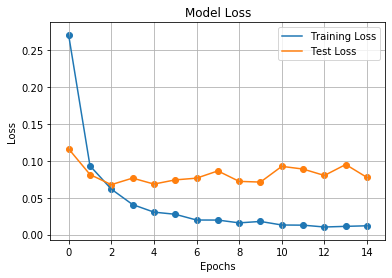

In [46]:
plt.plot(history_2_a.history['loss'], label='Training Loss')
plt.plot(history_2_a.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_2_a.history['loss'])
plt.scatter([i for i in range(epochs)], history_2_a.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 2.1.3 Epoch vs Accuracy

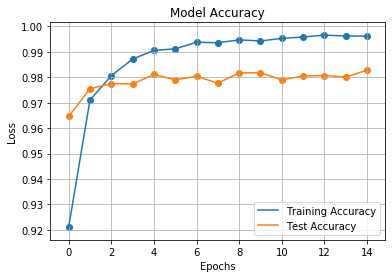

In [47]:
plt.plot(history_2_a.history['acc'], label='Training Accuracy')
plt.plot(history_2_a.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_2_a.history['acc'])
plt.scatter([i for i in range(epochs)], history_2_a.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 2.1.4 Distribution of Weights

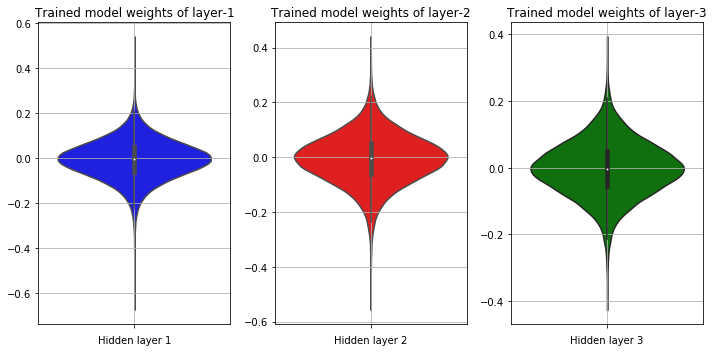

In [83]:
w_after_2_a = model_2_a.get_weights()
h1_w = w_after_2_a[0].flatten().reshape(-1,1)
h2_w = w_after_2_a[2].flatten().reshape(-1,1)
h3_w = w_after_2_a[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))
plt.title('Weights of the model after trained')

plt.subplot(1,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(1,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(1,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.show()

### 2.2 With Dropout and Batch Normalization

In [51]:
model_2_b = Sequential()
#hidden layer 1
model_2_b.add(Dense(units=512, input_shape=(num_pixels, ), activation='relu', kernel_initializer='normal'))
model_2_b.add(Dropout(0.5))

#hidden layer 2
model_2_b.add(Dense(units=256, activation='relu', kernel_initializer='normal'))
model_2_b.add(BatchNormalization())

#hidden layer 3
model_2_b.add(Dense(units=128, activation='relu', kernel_initializer='normal'))

#output layer
model_2_b.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

#compile with adam optimizers
model_2_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_2_b.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 568,458
Trainable params: 567,946
Non-trainable params: 512
______________________________________________

In [52]:
history_2_b = model_2_b.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.3175 - acc: 0.9038 - val_loss: 0.1088 - val_acc: 0.9676
Epoch 2/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.1438 - acc: 0.9545 - val_loss: 0.0887 - val_acc: 0.9722
Epoch 3/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.1119 - acc: 0.9648 - val_loss: 0.0741 - val_acc: 0.9762
Epoch 4/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.0973 - acc: 0.9695 - val_loss: 0.0740 - val_acc: 0.9762
Epoch 5/15
60000/60000 [==============================] - 3s 50us/step - loss: 0.0860 - acc: 0.9728 - val_loss: 0.0663 - val_acc: 0.9798
Epoch 6/15
60000/60000 [==============================] - 3s 47us/step - loss: 0.0749 - acc: 0.9763 - val_loss: 0.0702 - val_acc: 0.9793
Epoch 7/15
60000/60000 [==============================] - 3s 49us/step - loss: 0.0693 - acc: 0.9771 - val_loss: 0.0698 - val_acc

In [90]:
score_2_b = model_2_b.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with Dropout and BatchNorm', score_2_b[1])

Test accuracy with Dropout and BatchNorm 0.9844


### 2.2.1 Loss vs Epoch

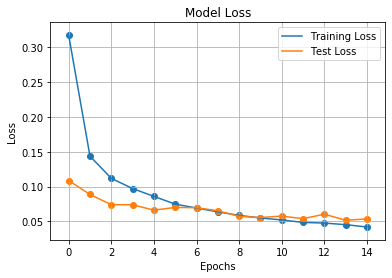

In [53]:
plt.plot(history_2_b.history['loss'], label='Training Loss')
plt.plot(history_2_b.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_2_b.history['loss'])
plt.scatter([i for i in range(epochs)], history_2_b.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 2.2.2 Accuracy vs Epoch

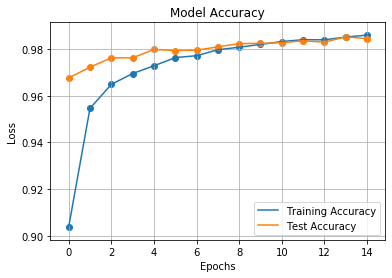

In [54]:
plt.plot(history_2_b.history['acc'], label='Training Accuracy')
plt.plot(history_2_b.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_2_b.history['acc'])
plt.scatter([i for i in range(epochs)], history_2_b.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 2.2.3 Distribution of Weights

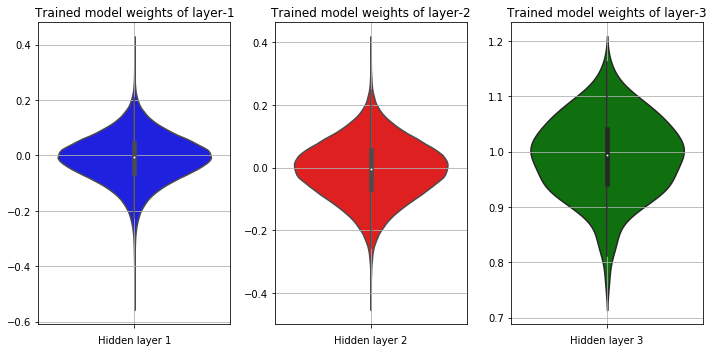

In [82]:
w_after_2_b = model_2_b.get_weights()
h1_w = w_after_2_b[0].flatten().reshape(-1,1)
h2_w = w_after_2_b[2].flatten().reshape(-1,1)
h3_w = w_after_2_b[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(10, 5))
plt.title('Weights of the model after trained')

plt.subplot(1,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(1,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(1,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.show()

## 3. Architecture - 3

### 3.1.1 Without Dropout and Batch Normalisation

In [58]:
model_3_a = Sequential()
#hidden layer 1
model_3_a.add(Dense(units=2048, input_shape=(num_pixels, ), activation='relu', kernel_initializer='normal'))

#hidden layer 2
model_3_a.add(Dense(units=1024, activation='relu', kernel_initializer='normal'))

#hidden layer 3
model_3_a.add(Dense(units=512, activation='relu', kernel_initializer='normal'))

#hidden layer 4
model_3_a.add(Dense(units=256, activation='relu', kernel_initializer='normal'))

#hidden layer 5
model_3_a.add(Dense(units=128, activation='relu', kernel_initializer='normal'))

#output layer
model_3_a.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

#compile with adam optimizers
model_3_a.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_3_a.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_17 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1290      
Total params: 4,396,170
Trainable params: 4,396,170
Non-trainable params: 0
____________________________________________

In [59]:
history_3_a = model_3_a.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 70us/step - loss: 0.2121 - acc: 0.9351 - val_loss: 0.1160 - val_acc: 0.9629
Epoch 2/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0875 - acc: 0.9733 - val_loss: 0.0979 - val_acc: 0.9693
Epoch 3/15
60000/60000 [==============================] - 4s 59us/step - loss: 0.0626 - acc: 0.9807 - val_loss: 0.0845 - val_acc: 0.9767
Epoch 4/15
60000/60000 [==============================] - 3s 58us/step - loss: 0.0452 - acc: 0.9865 - val_loss: 0.1115 - val_acc: 0.9694
Epoch 5/15
60000/60000 [==============================] - 3s 57us/step - loss: 0.0388 - acc: 0.9878 - val_loss: 0.0658 - val_acc: 0.9812
Epoch 6/15
60000/60000 [==============================] - 4s 60us/step - loss: 0.0302 - acc: 0.9905 - val_loss: 0.0910 - val_acc: 0.9763
Epoch 7/15
60000/60000 [==============================] - 3s 58us/step - loss: 0.0258 - acc: 0.9925 - val_loss: 0.0854 - val_acc

In [93]:
score_3_a = model_3_a.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy without Dropout and Batch Norm', score_3_a[1])

Test Accuracy without Dropout and Batch Norm 0.9779


### 3.1.1 Loss vs Epoch

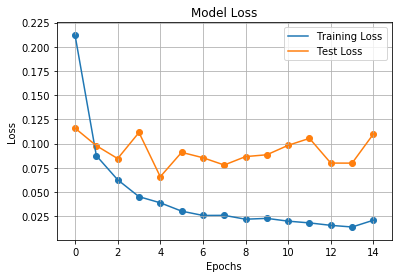

In [61]:
plt.plot(history_3_a.history['loss'], label='Training Loss')
plt.plot(history_3_a.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)],history_3_a.history['loss'] )
plt.scatter([i for i in range(epochs)],history_3_a.history['val_loss'] )
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 3.1.2 Accuracy vs Epoch

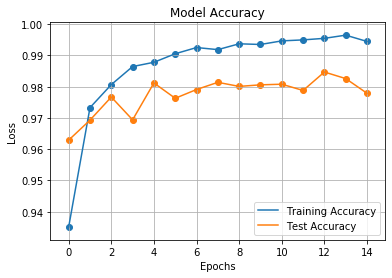

In [62]:
plt.plot(history_3_a.history['acc'], label='Training Accuracy')
plt.plot(history_3_a.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)],history_3_a.history['acc'] )
plt.scatter([i for i in range(epochs)],history_3_a.history['val_acc'] )

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 3.1.3 Distribution of Weights

In [0]:
w_after_3_a = model_3_a.get_weights()
h1_w = w_after_3_a[0].flatten().reshape(-1,1)
h2_w = w_after_3_a[2].flatten().reshape(-1,1)
h3_w = w_after_3_a[4].flatten().reshape(-1,1)
h4_w = w_after_3_a[6].flatten().reshape(-1,1)
h5_w = w_after_3_a[8].flatten().reshape(-1,1)

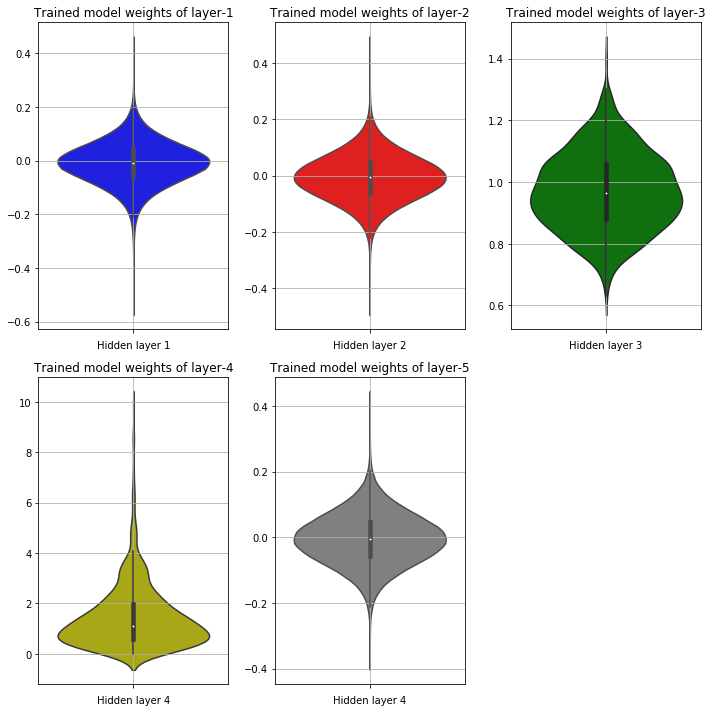

In [81]:
fig = plt.figure(figsize=(10, 10))
plt.title('Weights of the model after trained')

plt.subplot(2,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,4)
plt.title('Trained model weights of layer-4')
sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,5)
plt.title('Trained model weights of layer-5')
sns.violinplot(y=h5_w, color='gray')
plt.xlabel('Hidden layer 4')
plt.grid()
plt.tight_layout()

plt.show()

## 3.2 With Dropout and Batch Normalization

In [71]:
model_3_b = Sequential()
#hidden layer 1
model_3_b.add(Dense(units=2048, input_shape=(num_pixels, ), activation='relu', kernel_initializer='normal'))
model_3_b.add(Dropout(0.5))

#hidden layer 2
model_3_b.add(Dense(units=1024, activation='relu', kernel_initializer='normal'))
model_3_b.add(BatchNormalization())

#hidden layer 3
model_3_b.add(Dense(units=512, activation='relu', kernel_initializer='normal'))
model_3_b.add(Dropout(0.5))

#hidden layer 4
model_3_b.add(Dense(units=256, activation='relu', kernel_initializer='normal'))
model_3_b.add(BatchNormalization())

#hidden layer 5
model_3_b.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model_3_b.add(Dropout(0.5))
model_3_b.add(BatchNormalization())

#output layer
model_3_b.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

#compile with adam optimizers
model_3_b.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#summary
model_3_b.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_23 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)              

In [72]:
history_3_b = model_3_b.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 116us/step - loss: 0.4317 - acc: 0.8754 - val_loss: 0.1378 - val_acc: 0.9611
Epoch 2/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.1757 - acc: 0.9517 - val_loss: 0.1027 - val_acc: 0.9677
Epoch 3/15
60000/60000 [==============================] - 6s 93us/step - loss: 0.1360 - acc: 0.9621 - val_loss: 0.0758 - val_acc: 0.9777
Epoch 4/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.1121 - acc: 0.9688 - val_loss: 0.0944 - val_acc: 0.9729
Epoch 5/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.1034 - acc: 0.9716 - val_loss: 0.0759 - val_acc: 0.9779
Epoch 6/15
60000/60000 [==============================] - 6s 94us/step - loss: 0.0832 - acc: 0.9766 - val_loss: 0.0688 - val_acc: 0.9806
Epoch 7/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0790 - acc: 0.9779 - val_loss: 0.0702 - val_ac

In [94]:
score_3_b = model_3_b.evaluate(X_test, y_test, verbose=0)
print('Test accuracy with BatchNorm and Dropout', score_3_b[1])

Test accuracy with BatchNorm and Dropout 0.9846


### 3.2.1 Loss vs Epoch

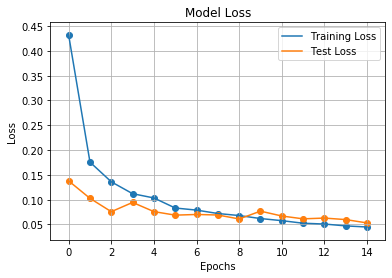

In [76]:
plt.plot(history_3_b.history['loss'], label='Training Loss')
plt.plot(history_3_b.history['val_loss'], label='Test Loss')
plt.scatter([i for i in range(epochs)], history_3_b.history['loss'])
plt.scatter([i for i in range(epochs)], history_3_b.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 3.2.2 Accuracy vs Epoch

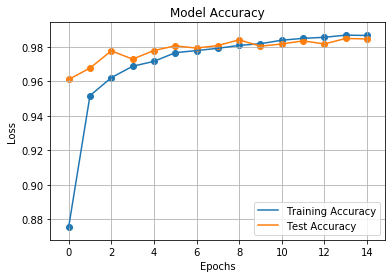

In [77]:
plt.plot(history_3_b.history['acc'], label='Training Accuracy')
plt.plot(history_3_b.history['val_acc'], label='Test Accuracy')
plt.scatter([i for i in range(epochs)], history_3_b.history['acc'])
plt.scatter([i for i in range(epochs)], history_3_b.history['val_acc'])

plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### 3.2.3 Distribution of Weights

In [0]:
w_after_3_b = model_3_b.get_weights()
h1_w = w_after_3_b[0].flatten().reshape(-1,1)
h2_w = w_after_3_b[2].flatten().reshape(-1,1)
h3_w = w_after_3_b[4].flatten().reshape(-1,1)
h4_w = w_after_3_b[6].flatten().reshape(-1,1)
h5_w = w_after_3_b[8].flatten().reshape(-1,1)

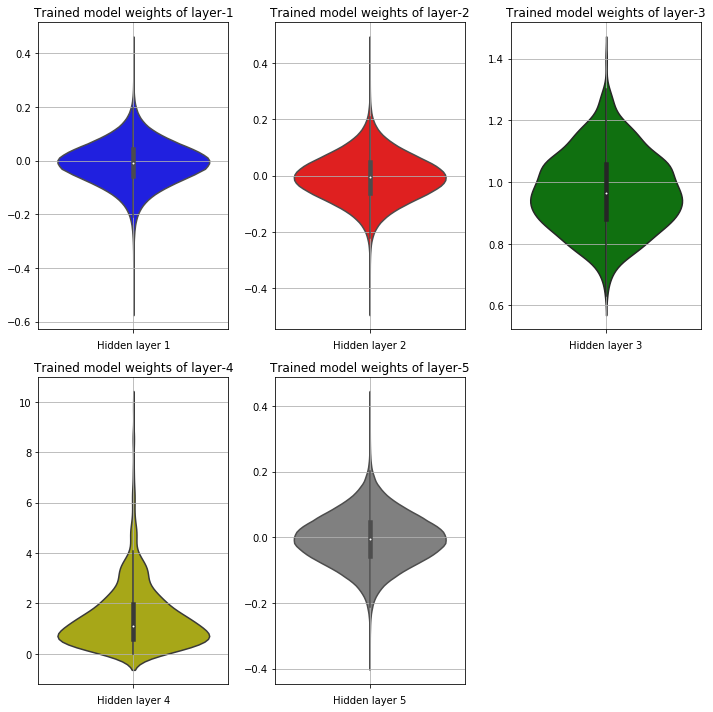

In [80]:
fig = plt.figure(figsize=(10, 10))
plt.title('Weights of the model after trained')

plt.subplot(2,3,1)
plt.title('Trained model weights of layer-1')
sns.violinplot(y=h1_w, color='b')
plt.xlabel('Hidden layer 1')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,2)
plt.title('Trained model weights of layer-2')
sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden layer 2')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,3)
plt.title('Trained model weights of layer-3')
sns.violinplot(y=h3_w, color='g')
plt.xlabel('Hidden layer 3')
plt.grid()
plt.tight_layout()

plt.subplot(2,3,4)
plt.title('Trained model weights of layer-4')
sns.violinplot(y=h4_w, color='y')
plt.xlabel('Hidden layer 4')
plt.tight_layout()
plt.grid()


plt.subplot(2,3,5)
plt.title('Trained model weights of layer-5')
sns.violinplot(y=h5_w, color='gray')
plt.xlabel('Hidden layer 5')
plt.grid()
plt.tight_layout()

plt.show()

## Comparison

[]

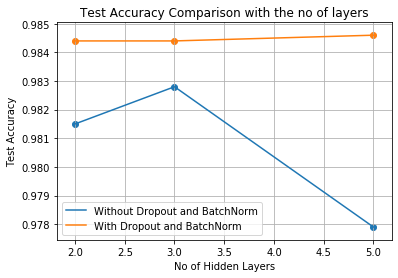

In [108]:
Test_accuracy_without_dropout_BN = [score_1_a[1], score_2_a[1], score_3_a[1]]
Test_accuracy_with_dropout_BN = [score_1_b[1], score_2_b[1], score_3_b[1]]
no_of_hidden_layer = [2, 3, 5]

plt.plot(no_of_hidden_layer, Test_accuracy_without_dropout_BN, label='Without Dropout and BatchNorm')
plt.plot(no_of_hidden_layer, Test_accuracy_with_dropout_BN, label='With Dropout and BatchNorm')
plt.scatter(no_of_hidden_layer, Test_accuracy_without_dropout_BN)
plt.scatter(no_of_hidden_layer, Test_accuracy_with_dropout_BN)

plt.title('Test Accuracy Comparison with the no of layers')
plt.grid()
plt.xlabel('No of Hidden Layers')
plt.ylabel('Test Accuracy')
#plt.yscale('symlog')
plt.legend()
plt.plot()

## Summary:
    - We can see that after adding the 5th hidden layer without dropout and Batch 
      Norm our Test accuracy starts to decrease but with Dropout and Test Norm 
      our Test Accuracy steadily increasing

# That's the end of the code